In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [49]:
def LCDM(z, theta):
    H0, Om = theta
    return H0*np.sqrt(Om*(1+z)**3+1-Om)

def Ez(z, theta):
    H0, Om = theta
    return np.sqrt(Om*(1+z)**3+1-Om)

def DcLCDM(z, theta):
    dc = np.zeros_like(z)
    for i in range(len(z)):
        dc[i], _ = quad(Ez, 0, z[i], args=(theta))
        if not np.isfinite(dc[i]):
            dc[i] = np.inf
    return H0*dc

In [93]:
def HzP21(z,theta):
    M, H0, q0, j0 = theta
    a0 = H0
    a1 = (H0*(6 + 10*j0 + 12*q0 + 7*j0*q0 - 3*q0**2 - 6*q0**3))/(3*(j0 - q0**2))
    a2 = (H0*(12 + 14*j0 + 3*j0**2 + 36*q0 + 22*j0*q0 + 24*q0**2 + 2*j0*q0**2 - 6*q0**3 - 3*q0**4))/(6*(j0 - q0**2))
    b1 = (6 + 7*j0 + 12*q0 + 4*j0*q0 - 3*q0**3)/(3*(j0 - q0**2))
        
    H = (a0+a1*z+a2*z**2)/(1+b1*z)

    return H

def EzP21(z,theta):
    M, H0, q0, j0 = theta
    a0 = H0
    a1 = (H0*(6 + 10*j0 + 12*q0 + 7*j0*q0 - 3*q0**2 - 6*q0**3))/(3*(j0 - q0**2))
    a2 = (H0*(12 + 14*j0 + 3*j0**2 + 36*q0 + 22*j0*q0 + 24*q0**2 + 2*j0*q0**2 - 6*q0**3 - 3*q0**4))/(6*(j0 - q0**2))
    b1 = (6 + 7*j0 + 12*q0 + 4*j0*q0 - 3*q0**3)/(3*(j0 - q0**2))
        
    H = (a0+a1*z+a2*z**2)/(1+b1*z)

    return H/H0

#Distancia comovel adimensional
def DcModelP21(z,theta):#Integrando e substituindo
    M, H0, q0, j0 = theta
    dc = np.zeros_like(z)
    a0 = H0
    a1 = (H0*(6 + 10*j0 + 12*q0 + 7*j0*q0 - 3*q0**2 - 6*q0**3))/(3*(j0 - q0**2))
    a2 = (H0*(12 + 14*j0 + 3*j0**2 + 36*q0 + 22*j0*q0 + 24*q0**2 + 2*j0*q0**2 - 6*q0**3 - 3*q0**4))/(6*(j0 - q0**2))
    b1 = (6 + 7*j0 + 12*q0 + 4*j0*q0 - 3*q0**3)/(3*(j0 - q0**2))

    for i in range(len(z)):
            dc[i], _ = quad(EzP21, 0, z[i], args=(theta))
            if not np.isfinite(dc[i]):
                dc[i] = np.inf
    return (H0)*dc
    
    '''if (a1**2-4*a0*a2) > 0:
        r1 = (-a1 + np.sqrt(a1**2-4*a2*a0))/(2*a2)
        r2 = (-a1 - np.sqrt(a1**2-4*a2*a0))/(2*a2)

        dc = (((1+b1*r2)/(r2-r1))*np.log(np.abs((z-r2)/(-r2)))-((1+b1*r1)/(r2-r1))*np.log(np.abs((z-r1)/(-r1))))/a2
        
    elif (a1**2-4*a0*a2) == 0:
        dc = ((1 + (a1*b1)/(2*a2))*2*a2*z)/(a1*(a1/(2*a2) + z)) + (b1*np.log(2*np.abs((a2*(a1/(2*a2) + z))/a1)))/a2
        
    elif (a1**2-4*a0*a2) < 0:
        dc = (b1/(2*a2))*np.log(np.abs((a0+a1*z+a2*z**2)/a0)) + (((2*a2-b1*a1))/(a2*np.sqrt(4*a2*a0-a1**2)))*(np.arctan((2*a2*z+a1)/np.sqrt(4*a2*a0-a1**2)) - np.arctan(a1/np.sqrt(4*a2*a0-a1**2)))

    return H0*dc'''

In [94]:
def HzP22(z, theta):
    M, H0, q0, j0, s0 = theta
    a0 = H0
    a1 = (H0*(-24 + 4*j0 + 8*j0**2 - 84*q0 + 54*j0*q0 + 10*j0**2*q0 - 114*q0**2 + 67*j0*q0**2 - 102*q0**3 + 15*j0*q0**3 - 63*q0**4 - 15*q0**5
              + 17*s0 + 2*j0*s0 + 28*q0*s0 + 9*q0**2*s0))/(2.*(6*j0 + 3*j0**2 + 14*j0*q0 - 6*q0**2 + 2*j0*q0**2 - 12*q0**3 - 3*q0**4 + 2*s0 + 2*q0*s0))
    a2 = (H0*(-144 + 24*j0 + 108*j0**2 + 30*j0**3 - 648*q0 + 216*j0*q0 + 150*j0**2*q0 - 1188*q0**2 + 252*j0*q0**2 - 5*j0**2*q0**2 - 1188*q0**3
              + 90*j0*q0**3 - 648*q0**4 + 60*j0*q0**4 - 180*q0**5 - 45*q0**6 + 78*s0 + 9*j0*s0 + 198*q0*s0 + 35*j0*q0*s0 + 153*q0**2*s0 +
              15*q0**3*s0 + 4*s0**2))/(12.*(6*j0 + 3*j0**2 + 14*j0*q0 - 6*q0**2 + 2*j0*q0**2 - 12*q0**3 - 3*q0**4 + 2*s0 + 2*q0*s0))
    b1 = (24 + 8*j0 - 2*j0**2 + 84*q0 - 14*j0*q0 - 4*j0**2*q0 + 102*q0**2 - 35*j0*q0**2 + 66*q0**3 - 11*j0*q0**3 + 33*q0**4 + 9*q0**5 -
              13*s0 - 2*j0*s0 - 20*q0*s0 - 5*q0**2*s0)/(-12*j0 - 6*j0**2 - 28*j0*q0 + 12*q0**2 - 4*j0*q0**2 + 24*q0**3 + 6*q0**4 - 4*s0 - 4*q0*s0)
    b2 = (-72*j0 - 60*j0**2 - 12*j0**3 - 180*j0*q0 - 30*j0**2*q0 + 72*q0**2 - 30*j0*q0**2 + 23*j0**2*q0**2 + 180*q0**3 + 30*j0*q0**3 +
          90*q0**4 - 24*j0*q0**4 + 9*q0**6 + 15*j0*s0 - 11*j0*q0*s0 - 15*q0**2*s0 + 3*q0**3*s0 - 4*s0**2)/(-72*j0 - 36*j0**2 - 168*j0*q0 
                                                                                                           + 72*q0**2 - 24*j0*q0**2 + 144*q0**3 + 36*q0**4 - 24*s0 - 24*q0*s0)
        
    H = (a0+a1*z+a2*z**2)/(1+b1*z+b2*z**2)

    return H

def EzP22(z, theta):
    M, H0, q0, j0, s0 = theta
    a0 = H0
    a1 = (H0*(-24 + 4*j0 + 8*j0**2 - 84*q0 + 54*j0*q0 + 10*j0**2*q0 - 114*q0**2 + 67*j0*q0**2 - 102*q0**3 + 15*j0*q0**3 - 63*q0**4 - 15*q0**5
              + 17*s0 + 2*j0*s0 + 28*q0*s0 + 9*q0**2*s0))/(2.*(6*j0 + 3*j0**2 + 14*j0*q0 - 6*q0**2 + 2*j0*q0**2 - 12*q0**3 - 3*q0**4 + 2*s0 + 2*q0*s0))
    a2 = (H0*(-144 + 24*j0 + 108*j0**2 + 30*j0**3 - 648*q0 + 216*j0*q0 + 150*j0**2*q0 - 1188*q0**2 + 252*j0*q0**2 - 5*j0**2*q0**2 - 1188*q0**3
              + 90*j0*q0**3 - 648*q0**4 + 60*j0*q0**4 - 180*q0**5 - 45*q0**6 + 78*s0 + 9*j0*s0 + 198*q0*s0 + 35*j0*q0*s0 + 153*q0**2*s0 +
              15*q0**3*s0 + 4*s0**2))/(12.*(6*j0 + 3*j0**2 + 14*j0*q0 - 6*q0**2 + 2*j0*q0**2 - 12*q0**3 - 3*q0**4 + 2*s0 + 2*q0*s0))
    b1 = (24 + 8*j0 - 2*j0**2 + 84*q0 - 14*j0*q0 - 4*j0**2*q0 + 102*q0**2 - 35*j0*q0**2 + 66*q0**3 - 11*j0*q0**3 + 33*q0**4 + 9*q0**5 -
              13*s0 - 2*j0*s0 - 20*q0*s0 - 5*q0**2*s0)/(-12*j0 - 6*j0**2 - 28*j0*q0 + 12*q0**2 - 4*j0*q0**2 + 24*q0**3 + 6*q0**4 - 4*s0 - 4*q0*s0)
    b2 = (-72*j0 - 60*j0**2 - 12*j0**3 - 180*j0*q0 - 30*j0**2*q0 + 72*q0**2 - 30*j0*q0**2 + 23*j0**2*q0**2 + 180*q0**3 + 30*j0*q0**3 +
          90*q0**4 - 24*j0*q0**4 + 9*q0**6 + 15*j0*s0 - 11*j0*q0*s0 - 15*q0**2*s0 + 3*q0**3*s0 - 4*s0**2)/(-72*j0 - 36*j0**2 - 168*j0*q0 
                                                                                                           + 72*q0**2 - 24*j0*q0**2 + 144*q0**3 + 36*q0**4 - 24*s0 - 24*q0*s0)
        
    H = (a0+a1*z+a2*z**2)/(1+b1*z+b2*z**2)

    return H/H0

def DcModelP22(z, theta):#Integrando e substituindo
    M, H0, q0, j0, s0 = theta
    dc = np.zeros_like(z)
    a0 = H0
    a1 = (H0*(-24 + 4*j0 + 8*j0**2 - 84*q0 + 54*j0*q0 + 10*j0**2*q0 - 114*q0**2 + 67*j0*q0**2 - 102*q0**3 + 15*j0*q0**3 - 63*q0**4 - 15*q0**5
              + 17*s0 + 2*j0*s0 + 28*q0*s0 + 9*q0**2*s0))/(2.*(6*j0 + 3*j0**2 + 14*j0*q0 - 6*q0**2 + 2*j0*q0**2 - 12*q0**3 - 3*q0**4 + 2*s0 + 2*q0*s0))
    a2 = (H0*(-144 + 24*j0 + 108*j0**2 + 30*j0**3 - 648*q0 + 216*j0*q0 + 150*j0**2*q0 - 1188*q0**2 + 252*j0*q0**2 - 5*j0**2*q0**2 - 1188*q0**3
              + 90*j0*q0**3 - 648*q0**4 + 60*j0*q0**4 - 180*q0**5 - 45*q0**6 + 78*s0 + 9*j0*s0 + 198*q0*s0 + 35*j0*q0*s0 + 153*q0**2*s0 +
              15*q0**3*s0 + 4*s0**2))/(12.*(6*j0 + 3*j0**2 + 14*j0*q0 - 6*q0**2 + 2*j0*q0**2 - 12*q0**3 - 3*q0**4 + 2*s0 + 2*q0*s0))
    b1 = (24 + 8*j0 - 2*j0**2 + 84*q0 - 14*j0*q0 - 4*j0**2*q0 + 102*q0**2 - 35*j0*q0**2 + 66*q0**3 - 11*j0*q0**3 + 33*q0**4 + 9*q0**5 -
              13*s0 - 2*j0*s0 - 20*q0*s0 - 5*q0**2*s0)/(-12*j0 - 6*j0**2 - 28*j0*q0 + 12*q0**2 - 4*j0*q0**2 + 24*q0**3 + 6*q0**4 - 4*s0 - 4*q0*s0)
    b2 = (-72*j0 - 60*j0**2 - 12*j0**3 - 180*j0*q0 - 30*j0**2*q0 + 72*q0**2 - 30*j0*q0**2 + 23*j0**2*q0**2 + 180*q0**3 + 30*j0*q0**3 +
          90*q0**4 - 24*j0*q0**4 + 9*q0**6 + 15*j0*s0 - 11*j0*q0*s0 - 15*q0**2*s0 + 3*q0**3*s0 - 4*s0**2)/(-72*j0 - 36*j0**2 - 168*j0*q0
              + 72*q0**2 - 24*j0*q0**2 + 144*q0**3 + 36*q0**4 - 24*s0 - 24*q0*s0)
    for i in range(len(z)):
        dc[i], _ = quad(EzP22, 0, z[i], args=(theta))
        if not np.isfinite(dc[i]):
            dc[i] = np.inf
    return (H0)*dc
    '''if (a1**2-4*a0*a2) > 0:
        r1 = (-a1 + np.sqrt(a1**2-4*a2*a0))/(2*a2)
        r2 = (-a1 - np.sqrt(a1**2-4*a2*a0))/(2*a2)
        dc = (((1 + b1*r2 + r2**2)/(r2 - r1))*np.log(np.abs((z - r2)/(-r2))) - ((1 + b1*r1 + r1**2)/(r2 - r1))*np.log(np.abs((z-r1)/(-r1))) + z)/a2
        
    elif (a1**2-4*a0*a2) == 0:
        dc = ((b1 - (b2*a1)/(2*a2))*np.log(np.abs((2*a2*z + a1)/a1)) - (1 - (b1*a1)/(2*a2) + (b2*a1)/(4*a2**2))*(1/(a1*(2*a2*z +a1)) - b2)*z)/a2
        
    elif (a1**2-4*a0*a2) < 0:
        dc = ((b2*z)/a2 + (b1/(2*a2) - (b2*a1)/(2*a2**2))*np.log(np.abs((a0+a1*z+a2*z**2)/a0)) + (((2*a2-b1*a1 - b2*(2*a2*a0 - a1**2)/a2))/(a2*np.sqrt(4*a2*a0-a1**2)))*(np.arctan((2*a2*z+a1)/np.sqrt(4*a2*a0-a1**2))
                    - np.arctan(a1/np.sqrt(4*a2*a0-a1**2))))/a2

    return H0*dc'''

In [95]:
def HzP31(z, theta):
    M, H0, q0, j0, s0 = theta
    a0 = H0
    a1 = -0.25*(H0*(24 - 4*j0 + 4*j0**2 + 60*q0 - 50*j0*q0 + 54*q0**2 - 41*j0*q0**2 + 48*q0**3 + 27*q0**4 - 17*s0 - 11*q0*s0))/(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0)
    a2 = (H0*(-24 - 8*j0 + 2*j0**2 - 84*q0 + 14*j0*q0 + 4*j0**2*q0 - 102*q0**2 + 35*j0*q0**2 - 66*q0**3 + 
              11*j0*q0**3 - 33*q0**4 - 9*q0**5 + 13*s0 + 2*j0*s0 + 20*q0*s0 + 5*q0**2*s0))/(4.*(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0))
    a3 = -0.0417*(H0*(72*j0 + 60*j0**2 + 12*j0**3 + 180*j0*q0 + 30*j0**2*q0 - 72*q0**2 + 30*j0*q0**2 - 
                      23*j0**2*q0**2 - 180*q0**3 - 30*j0*q0**3 - 90*q0**4 + 24*j0*q0**4 - 9*q0**6 - 15*j0*s0 + 11*j0*q0*s0 + 
                      15*q0**2*s0 - 3*q0**3*s0 + 4*s0**2))/(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0) #0.041666666666666664
    b1 = (-24 - 8*j0 - 4*j0**2 - 60*q0 + 22*j0*q0 - 42*q0**2 + 25*j0*q0**2 - 24*q0**3 - 15*q0**4 + 13*s0 + 7*q0*s0)/(4.*(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0))

    H = (a0 + a1*z + a2*z**2 + a3*z**3)/(1 + b1*z)

    return H

def EzP31(z, theta):
    M, H0, q0, j0, s0 = theta
    a0 = H0
    a1 = -0.25*(H0*(24 - 4*j0 + 4*j0**2 + 60*q0 - 50*j0*q0 + 54*q0**2 - 41*j0*q0**2 + 48*q0**3 + 27*q0**4 - 17*s0 - 11*q0*s0))/(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0)
    a2 = (H0*(-24 - 8*j0 + 2*j0**2 - 84*q0 + 14*j0*q0 + 4*j0**2*q0 - 102*q0**2 + 35*j0*q0**2 - 66*q0**3 + 
              11*j0*q0**3 - 33*q0**4 - 9*q0**5 + 13*s0 + 2*j0*s0 + 20*q0*s0 + 5*q0**2*s0))/(4.*(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0))
    a3 = -0.0417*(H0*(72*j0 + 60*j0**2 + 12*j0**3 + 180*j0*q0 + 30*j0**2*q0 - 72*q0**2 + 30*j0*q0**2 - 
                      23*j0**2*q0**2 - 180*q0**3 - 30*j0*q0**3 - 90*q0**4 + 24*j0*q0**4 - 9*q0**6 - 15*j0*s0 + 11*j0*q0*s0 + 
                      15*q0**2*s0 - 3*q0**3*s0 + 4*s0**2))/(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0) #0.041666666666666664
    b1 = (-24 - 8*j0 - 4*j0**2 - 60*q0 + 22*j0*q0 - 42*q0**2 + 25*j0*q0**2 - 24*q0**3 - 15*q0**4 + 13*s0 + 7*q0*s0)/(4.*(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0))

    H = (a0 + a1*z + a2*z**2 + a3*z**3)/(1 + b1*z)

    return H/H0

#Distancia comovel adimensional
def DcModelP31(z,theta):#Integrando e substituindo
    M, H0, q0, j0, s0 = theta
    dc = np.zeros_like(z)
    
    a0 = H0
    a1 = -0.25*(H0*(24 - 4*j0 + 4*j0**2 + 60*q0 - 50*j0*q0 + 54*q0**2 - 41*j0*q0**2 + 48*q0**3 + 27*q0**4 - 17*s0 - 11*q0*s0))/(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0)
    
    a2 = (H0*(-24 - 8*j0 + 2*j0**2 - 84*q0 + 14*j0*q0 + 4*j0**2*q0 - 102*q0**2 + 35*j0*q0**2 - 66*q0**3 + 11*j0*q0**3 - 
              33*q0**4 - 9*q0**5 + 13*s0 + 2*j0*s0 + 20*q0*s0 + 5*q0**2*s0))/(4.*(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0))
    
    a3 = -0.0417*(H0*(72*j0 + 60*j0**2 + 12*j0**3 + 180*j0*q0 + 30*j0**2*q0 - 72*q0**2 + 30*j0*q0**2 - 
                      23*j0**2*q0**2 - 180*q0**3 - 30*j0*q0**3 - 90*q0**4 + 24*j0*q0**4 - 9*q0**6 - 15*j0*s0 + 11*j0*q0*s0 + 
                      15*q0**2*s0 - 3*q0**3*s0 + 4*s0**2))/(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0) #0.041666666666666664
    
    b1 = (-24 - 8*j0 - 4*j0**2 - 60*q0 + 22*j0*q0 - 42*q0**2 + 25*j0*q0**2 - 24*q0**3 - 15*q0**4 + 13*s0 + 7*q0*s0)/(4.*(3*j0 + 4*j0*q0 - 3*q0**2 - 3*q0**3 + s0))

    for i in range(len(z)):
        dc[i], _ = quad(EzP31, 0, z[i], args=(theta))
        if not np.isfinite(dc[i]):
            dc[i] = np.inf
    return (H0)*dc


In [25]:
M = -19
Om = 0.3
H0 = 73
q0 = -0.55
j0 = 1
s0 = -0.35
z = np.linspace(0,2.5, 200)

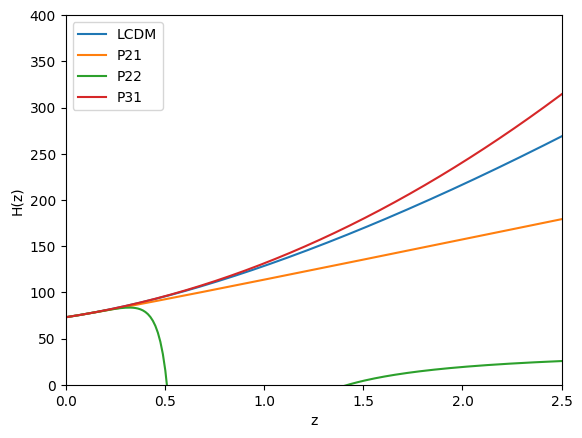

In [101]:
plt.plot(z, LCDM(z, [H0, Om]), label="LCDM")
plt.plot(z, HzP21(z, [M, H0, q0, j0]), label="P21")
plt.plot(z, HzP22(z, [M, H0, q0, j0, s0]), label="P22")
plt.plot(z, HzP31(z, [M, H0, q0, j0, s0]), label="P31")
plt.legend()
plt.xlim(0,2.5)
plt.ylim(0,400)
plt.xlabel('z')
plt.ylabel('H(z)')
plt.savefig('HzTeste_NoP22.jpg')
plt.show()

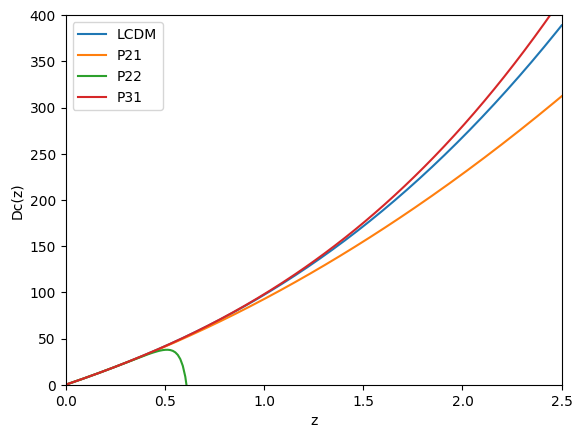

In [103]:
plt.plot(z, DcLCDM(z, [H0, Om]), label="LCDM")
plt.plot(z, DcModelP21(z, [M, H0, q0, j0]), label="P21")
plt.plot(z, DcModelP22(z, [M, H0, q0, j0, s0]), label="P22")
plt.plot(z, DcModelP31(z, [M, H0, q0, j0, s0]), label="P31")
plt.legend()
plt.xlim(0,2.5)
plt.ylim(0, 400)
plt.xlabel('z')
plt.ylabel('Dc(z)')
plt.savefig('DcTeste.jpg')
plt.show()

In [62]:
print(LCDM(2, [H0, Om]))
print(HzP21(2, [M, H0, q0, j0]))
print(HzP22(2, [M, H0, q0, j0, s0]))
print(HzP31(2, [M, H0, q0, j0, s0]))

216.55299582319333
157.24445858625418
19.201249876560638
240.63306959631166


In [68]:
print(DcLCDM([2], [H0, Om]))
print(DcModelP21(2, [M, H0, q0, j0]))
print(DcModelP22(2, [M, H0, q0, j0, s0]))
print(DcModelP31([2], [M, H0, q0, j0, s0]))

[219]
1.3445910723112995
2.7440561982455782
[219]
